<a href="https://colab.research.google.com/github/prajvalBolegave/CNN/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Traininglab'
valid_path = '/content/drive/MyDrive/Testinglab'

In [4]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Traininglab/*')
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Found 1364 images belonging to 10 classes.
Found 91 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


43/43 [==============================] - 1050s 24s/step - loss: 8.9290 - accuracy: 0.1144 - val_loss: 3.9150 - val_accuracy: 0.0989
Epoch 2/20
43/43 [==============================] - 972s 23s/step - loss: 2.7137 - accuracy: 0.1694 - val_loss: 2.5155 - val_accuracy: 0.1429
Epoch 3/20
43/43 [==============================] - 977s 23s/step - loss: 2.5295 - accuracy: 0.1796 - val_loss: 3.5904 - val_accuracy: 0.1099
Epoch 4/20
43/43 [==============================] - 988s 23s/step - loss: 2.6831 - accuracy: 0.1972 - val_loss: 4.3432 - val_accuracy: 0.0989
Epoch 5/20
43/43 [==============================] - 996s 23s/step - loss: 2.8923 - accuracy: 0.2060 - val_loss: 2.8242 - val_accuracy: 0.1538
Epoch 6/20
43/43 [==============================] - 978s 23s/step - loss: 2.6729 - accuracy: 0.1957 - val_loss: 3.8459 - val_accuracy: 0.0440
Epoch 7/20
43/43 [==============================] - 974s 23s/step - loss: 2.4257 - accuracy: 0.2221 - val_loss: 3.3176 - val_accuracy: 0.0220
Epoch 8/20
43/43

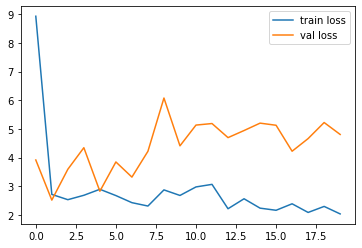

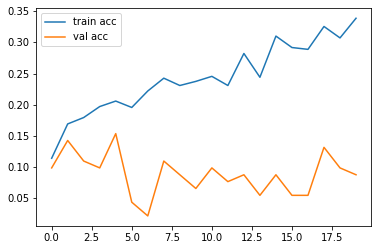

<Figure size 432x288 with 0 Axes>

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Traininglab',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Testinglab',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from keras.preprocessing.image import load_img

In [15]:
training_set.class_indices

{'INDIA100NEW': 0,
 'INDIA100OLD': 1,
 'INDIA10NEW': 2,
 'INDIA10OLD': 3,
 'INDIA20': 4,
 'INDIA200': 5,
 'INDIA2000': 6,
 'INDIA500': 7,
 'INDIA50NEW': 8,
 'INDIA50OLD': 9}

In [16]:
import os
from keras.preprocessing import image

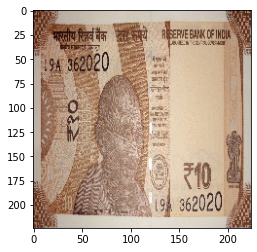

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


500


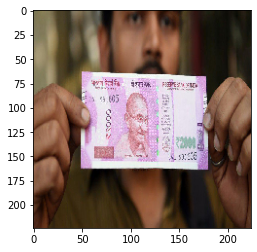

500


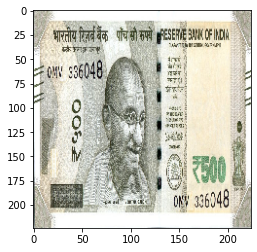

500


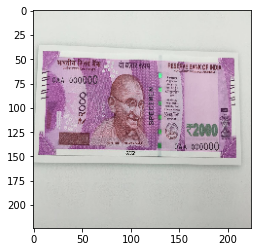

500


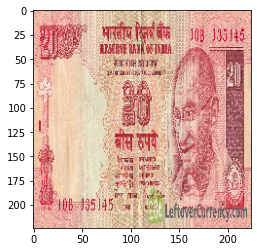

500


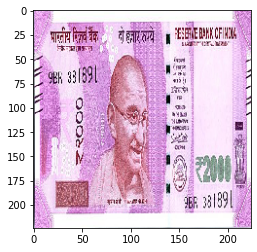

2000


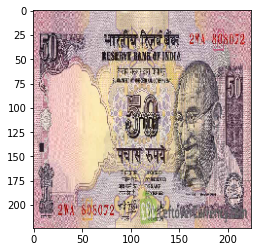

500


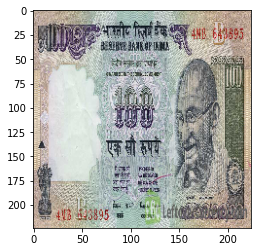

500


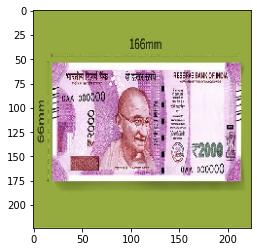

50New


In [19]:
path='/content/drive/MyDrive/Final'
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("100New")
    elif pred[0][1]>0.5:
        print("1ooOld")
    elif pred[0][2]>0.5:
        print("10New")
    elif pred[0][3]>0.5:
        print("1oOld")
    elif pred[0][4]>0.5:
        print("20")
    elif pred[0][5]>0.5:
        print("2oo")
    elif pred[0][6]>0.5:
        print("2000")
    elif pred[0][7]>0.5:
        print("500")
    elif pred[0][8]>0.5:
        print("50New")
    elif pred[0][9]>0.5:
        print("50Old")
    else:
        print("Not matching")

In [ ]:
model.save('runno1.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/runno1.h5')

In [ ]:
loaded_model.fit(train_x, train_y, epochs = 7, validation_data = (val_x,val_y),verbose=1)